<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%84%A4%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전체 구조

1. **데이터 생성**: 100명의 환자에 대한 임의의 건강 지표 데이터를 생성하였습니다. 또한 해당 환자들의 생존 또는 사망 라벨도 임의로 생성하였습니다.
2. **딥러닝 모델 구성**: 입력층, 하나의 은닉층, 그리고 출력층으로 구성된 간단한 딥러닝 모델을 만들었습니다. 이진 분류를 위해 출력층의 활성화 함수로 시그모이드를 사용하였습니다.
3. **모델 학습**: Adam 최적화기를 사용하여 모델을 학습시켰습니다.
4. **모델 평가**: 학습된 모델의 정확도를 평가하였습니다.

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

np.random.seed(0)

In [2]:
# 100명의 환자 데이터 생성 - BMI, 종양 크기, 혈당 수치
x = np.random.rand(100, 3)
# 생존 또는 사망 라벨 생성
y = np.random.randint(2, size=100)

# 모델 구성 - 입력, 은닉, 출력
model_example = Sequential()
model_example.add(Dense(16, input_dim=3, activation='relu'))
model_example.add(Dense(1, activation='sigmoid'))

# 모델 학습
model_example.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
history = model_example.fit(x, y, epochs=100, verbose=0)

# 모델 평가
loss, accuracy = model_example.evaluate(x, y)
accuracy

4/4 [==============================] - 0s 5ms/step - loss: 0.6843 - accuracy: 0.5800


0.5799999833106995

| 손실 함수 유형 | 함수 이름 | 적용 분야 |
| --- | --- | --- |
| 평균 제곱 오차 계열 | MSE (Mean Squared Error) | 회귀 문제 |
| 평균 제곱 오차 계열 | RMSE (Root Mean Squared Error) | 회귀 문제 |
| 교차 엔트로피 계열 | Binary Cross-Entropy | 이진 분류 문제 |
| 교차 엔트로피 계열 | Categorical Cross-Entropy | 다중 클래스 분류 문제 |

# 분류 문제

## 1. 데이터 import 및 전처리

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# 데이터 로딩
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# 데이터 분할
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. 상관관계 확인

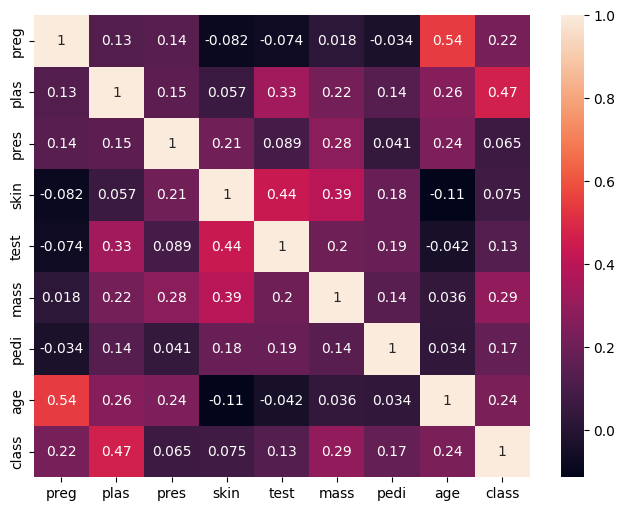

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## 3. 딥러닝 모델 학습

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 3s 7ms/step - loss: 0.7863 - accuracy: 0.3730
Epoch 2/150
62/62 [==============================] - 0s 8ms/step - loss: 0.7006 - accuracy: 0.5586
Epoch 3/150
62/62 [==============================] - 0s 6ms/step - loss: 0.6682 - accuracy: 0.6759
Epoch 4/150
62/62 [==============================] - 0s 6ms/step - loss: 0.6478 - accuracy: 0.7248
Epoch 5/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6327 - accuracy: 0.7345
Epoch 6/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6165 - accuracy: 0.7443
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6009 - accuracy: 0.7492
Epoch 8/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.7573
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.7557
Epoch 10/150
62/62 [==============================] - 0s 6ms/step - loss: 0.5499 - accuracy: 0.7638
Epoch 11/

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


1. **dense (Dense) 레이어**:
    - 입력층은 8개의 뉴런(입력 특성)을 가지며, 출력층은 12개의 뉴런을 가집니다.
    - 각 입력 뉴런은 12개의 출력 뉴런과 연결되어 있으므로 연결 가중치는 `8×12=96`개입니다.
    - 또한, 각 출력 뉴런에는 편향이 하나씩 있으므로, 편향은 총 12개입니다.
    - 따라서, 첫 번째 레이어의 총 파라미터 수는 `96+12=108`개입니다.
        
2. **dense_1 (Dense) 레이어**:
    - 이전 레이어의 출력 뉴런은 12개이며, 이 레이어의 출력 뉴런은 8개입니다.
    - 각 입력 뉴런(12개)은 8개의 출력 뉴런과 연결되어 있으므로 연결 가중치는 `12×8=96`개입니다.
    - 또한, 각 출력 뉴런에는 편향이 하나씩 있으므로, 편향은 총 8개입니다.
    - 따라서, 두 번째 레이어의 총 파라미터 수는 `96+8=104`개입니다.        
        
3. **dense_2 (Dense) 레이어**:
    - 이전 레이어의 출력 뉴런은 8개이며, 이 레이어의 출력 뉴런은 1개입니다.
    - 각 입력 뉴런(8개)은 1개의 출력 뉴런과 연결되어 있으므로 연결 가중치는 8개입니다.
    - 출력 뉴런에는 편향이 하나 있습니다.
    - 따라서, 세 번째 레이어의 총 파라미터 수는 `8+1=9`개입니다.

이렇게 각 레이어의 연결 가중치와 편향을 합산하여 파라미터의 총 수를 구할 수 있습니다.

## 4. 중요변수 추출

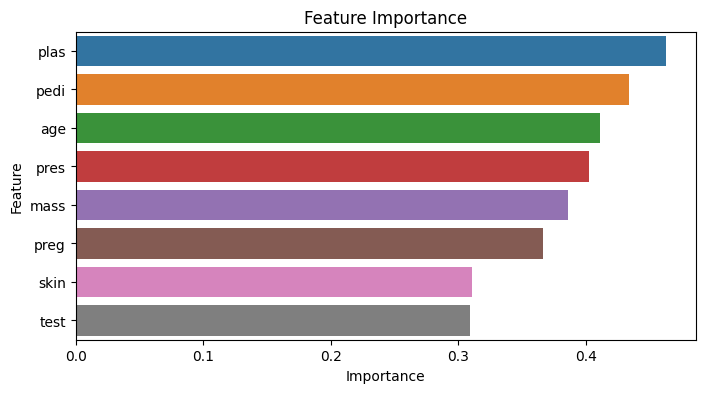

,Feature,Importance
1,plas,0.462761
6,pedi,0.433769
7,age,0.411104
2,pres,0.402161
5,mass,0.385986
0,preg,0.366353
3,skin,0.310358
4,test,0.308814


In [9]:
import numpy as np

# 첫 번째 레이어의 가중치 추출
weights = model.layers[0].get_weights()[0]

# 각 입력 변수에 대한 중요도 계산
importances = np.mean(np.abs(weights), axis=1)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'],
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame and plot the importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

importance_df

## 5. 모델 평가

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

5/5 [==============================] - 0s 5ms/step - loss: 0.5644 - accuracy: 0.7662
Test Accuracy: 76.62%


# 다중 분류 문제

이진 분류문제와 다중 분류문제의 차이점은 무엇이 있을까요?

사실 모든 과정이 거의 동일하지만, 차이점은 타겟변수에 대한 처리가 달라지는 것입니다.

1. 출력층의 노드수가 1 → 3으로 변경되었다는 점
이를 출력하기 위해 원핫인코딩으로 타겟변수를 변경하였고, 그래서 마지막 출력층에 Dense가 3으로 변경되었고,
2. activation도 `softmax`로 변경되었습니다.
소프트맥스 함수는 쉽게 여러 범주의 타겟에 각자의 예측 확률을 계산해주는 함수입니다.
3. 손실함수도 binary_crossentropy에서 `categorical_crossentropy로` 변경되었습니다.

이 세가지 외에는 사실 모든 과정이 거의 비슷합니다.

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 데이터 로딩
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
# 데이터 전처리
X = data.drop('species', axis=1)
y = data['species']

# 원-핫 인코딩
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

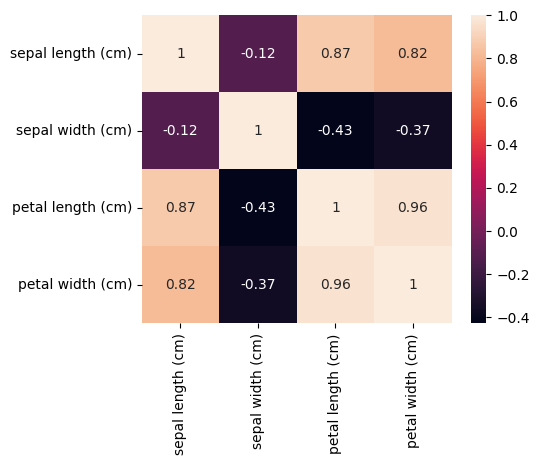

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬
correlation_matrix = X.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers import Dense

# 모델 구성
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 1 -> 3, sigmoid -> softmax

# 모델 컴파일
model.compile(loss='categorical_crossentropy', # binary -> categorical
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
12/12 [==============================] - 1s 2ms/step - loss: 1.1989 - accuracy: 0.1417
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 1.1541 - accuracy: 0.2417
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 1.1138 - accuracy: 0.3417
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0776 - accuracy: 0.4583
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0425 - accuracy: 0.5000
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0070 - accuracy: 0.5750
Epoch 7/150
12/12 [==============================] - 0s 3ms/step - loss: 0.9703 - accuracy: 0.6000
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 0.9319 - accuracy: 0.6167
Epoch 9/150
12/12 [==============================] - 0s 3ms/step - loss: 0.8914 - accuracy: 0.6500
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 0.8482 - accuracy: 0.6667
Epoch 11/

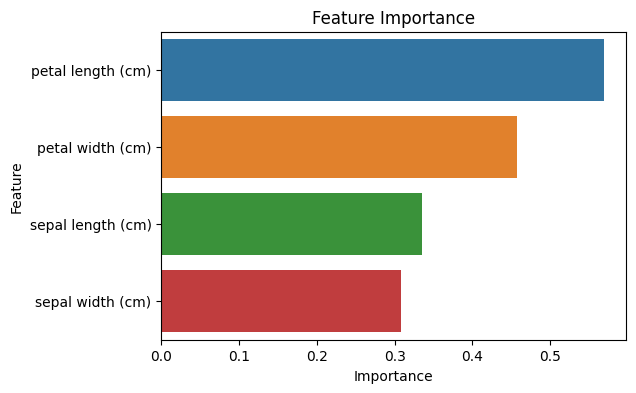

,Feature,Importance
2,petal length (cm),0.569454
3,petal width (cm),0.457741
0,sepal length (cm),0.335610
1,sepal width (cm),0.308758


In [16]:
# 첫 번째 레이어의 가중치 추출
weights = model.layers[0].get_weights()[0]

# 각 입력 변수에 대한 중요도 계산
importances = np.mean(np.abs(weights), axis=1)

# 중요도 시각화
importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

importance_df

In [17]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 171ms/step - loss: 0.0471 - accuracy: 1.0000
Test Accuracy: 100.00%
